<a href="https://colab.research.google.com/github/iotpelican/ml-llm-course-work/blob/main/ss_T27_hw_06_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# @title Assignment 06 - Convolutional Neural Networks

Assignment Submission Instructions

● Submit a PDF file that includes all code, output, and results.

● Export your Jupyter Notebook / Colab Notebook as a PDF.

● Comment your code to explain key steps.

● Ensure plots have clear titles and axis labels.

● Organize your code using functions where appropriate.

● The PDF should clearly present all steps and results in a well-structured and readable format.

Building a Simple 1D Convolutional Neural Network (CNN) for Classification using the Iris Dataset

**Objective:**

In this assignment, you will:

1. Learn the structure of a 1D Convolutional Neural Network (CNN).

2. Build and train a simple CNN for classification on the Iris dataset (a multiclass classification problem).

3. Evaluate the model’s performance and make observations.

In [3]:
# @title Step 1: Install Required Libraries
#Install the following libraries:
#● TensorFlow: pip install tensorflow
#● scikit-learn: pip install scikit-learn
#● Matplotlib: pip install matplotlib

In [4]:
# @title Import libraries in Colab environment
import tensorflow as tf
import sklearn
import matplotlib.pyplot as plt

In [6]:
# @title Step 2 Questions: Load and Preprocess the Data


1. Load the Iris Dataset using scikit-learn.
2. Standardize the Data to scale features.
3. Split the Data into training (80%) and testing (20%).
4. Reshape the Data for 1D CNN:
○ Format: (samples, features, channels)
○ Use: (samples, 4, 1) since Iris has 4 features and 1 channel

In [7]:
# @title Step 2 Code & Answers:

# 1. Load the Iris Dataset
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

# 2. Standardize the Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Split the Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 4. Reshape the Data for a 1D CNN
import numpy as np
X_train_reshaped = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Print the shapes to verify
print("Original shape:", X.shape)
print("Standardized shape:", X_scaled.shape)
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)
print("Reshaped training data shape:", X_train_reshaped.shape)
print("Reshaped testing data shape:", X_test_reshaped.shape)

Original shape: (150, 4)
Standardized shape: (150, 4)
Training data shape: (120, 4)
Testing data shape: (30, 4)
Reshaped training data shape: (120, 4, 1)
Reshaped testing data shape: (30, 4, 1)


In [ ]:
# @title Step 3 Questions: Build the CNN Model

Construct a simple 1D CNN with the following:
1. Conv1D Layer with 32 filters, kernel size of 3, and ReLU activation.
2. MaxPooling1D Layer to downsample.
3. Flatten Layer to flatten the output.
4. Dense Layer with 64 neurons and ReLU activation.
5. Output Layer with 3 neurons and softmax activation (for 3-class classification).

In [9]:
# @title Step 3 Code  & Answers:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Input

# Define the model
model = Sequential()

model.add(Input(shape=(4, 1)))  # instruction to Keras to use explict Input shape for first layer

# Add the 1D Convolutional Layer
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))

# Add the 1D Max Pooling Layer
model.add(MaxPooling1D(pool_size=2))

# Flatten the output for the Dense layers
model.add(Flatten())

# Add a Dense (fully connected) Layer
model.add(Dense(units=64, activation='relu'))

# Add the Output Layer
model.add(Dense(units=3, activation='softmax'))

# Print a summary of the model's architecture
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)               │ (None, 2, 32)          │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 1, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,435 (9.51 KB)

 Trainable params: 2,435 (9.51 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# @title Step 4 Question: Compile the Model

Compile your model using:

● Optimizer: Adam

● Loss Function: sparse_categorical_crossentropy

● Metrics: Accuracy


In [10]:
# @title Step 4 : Code & Answers

# The optimizer is the algorithm that adjusts the model's weights during training to minimize the loss.
# Adam is a popular optimizer that adapts the learning rate during training.

# The loss function measures how well the model's predictions match the true labels.
# Sparse categorical cross-entropy is applied as there more than two classes (the three iris species)
# and target labels are integers (e.g., 0, 1, 2) rather than one-hot encoded vectors.

# A metric is used to monitor the training and testing steps.
# Accuracy is a common metric that simply calculates the percentage of correctly classified instances.

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# @title Step 5 Question: Train the Model

1. Use model.fit() method
2. Set epochs (e.g., 10) and batch size (e.g., 8)
3. Include validation split (e.g., 20%)

In [11]:
# @title Step 5 Code & Answers:

# history variable will store a record of the training process,
# including the loss and accuracy metrics for both the training and validation sets at each epoch
history = model.fit(       # method to train Keras model
    X_train_reshaped,      # variable contains your input data
    y_train,               # contains the corresponding target labels
    epochs=10,             # the model should go through all the training data 10 times
    batch_size=8,          # the model will process 8 samples at a time before making an update.
    validation_split=0.2   # 20% of the training data to be used to monitor the model's performance on unseen data during training.
)

Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5046 - loss: 1.0399 - val_accuracy: 0.5417 - val_loss: 0.9938
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6912 - loss: 0.8610 - val_accuracy: 0.7083 - val_loss: 0.9069
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8021 - loss: 0.7470 - val_accuracy: 0.7917 - val_loss: 0.8039
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7571 - loss: 0.7368 - val_accuracy: 0.8333 - val_loss: 0.7116
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7907 - loss: 0.5914 - val_accuracy: 0.8750 - val_loss: 0.6294
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8084 - loss: 0.5939 - val_accuracy: 0.8750 - val_loss: 0.5559
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8323 - loss: 0.4358 - val_accuracy: 0.8750 - val_loss: 0.5010
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8465 - loss: 0.4362 - val_accuracy: 0.8750 - val_loss

In [12]:
# @title Step 6 Question: Evaluate the Model

1. Evaluate on test set using model.evaluate()
2. Report test accuracy and discuss observations

In [19]:
# @title Step 6 Code & Answers or Observations:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_reshaped, y_test, verbose=0)
    # model.evaluate() returns the loss and metrics for the model
    # The order of the returned values matches the order of the metrics
    # provided during the model's compilation step.
    # In this case, it returns 'loss' and 'accuracy'.
    # The verbose=0 argument suppresses the progress bar output during evaluation.


test_loss, test_accuracy = model.evaluate(X_test_reshaped, y_test, verbose=0)

# Print the results
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"      A high test accuracy (close to 1.0) is a good sign that your model has learned the patterns in the Iris dataset effectively \n      and isn't just memorizing the training data.")
print(f"Test Loss: {test_loss:.4f}")
print(f"      The test loss provides measure of the model's performance on the test set, with a lower value being better.")

Test Accuracy: 0.9000
      A high test accuracy (close to 1.0) is a good sign that your model has learned the patterns in the Iris dataset effectively 
      and isn't just memorizing the training data.
Test Loss: 0.3122
      The test loss provides measure of the model's performance on the test set, with a lower value being better.


In [ ]:
# @title Step 7 Question: Visualize the Results

1. Plot training and validation accuracy over epochs
2. Plot training and validation loss over epochs
3. Use matplotlib and include titles, axis labels, and legends

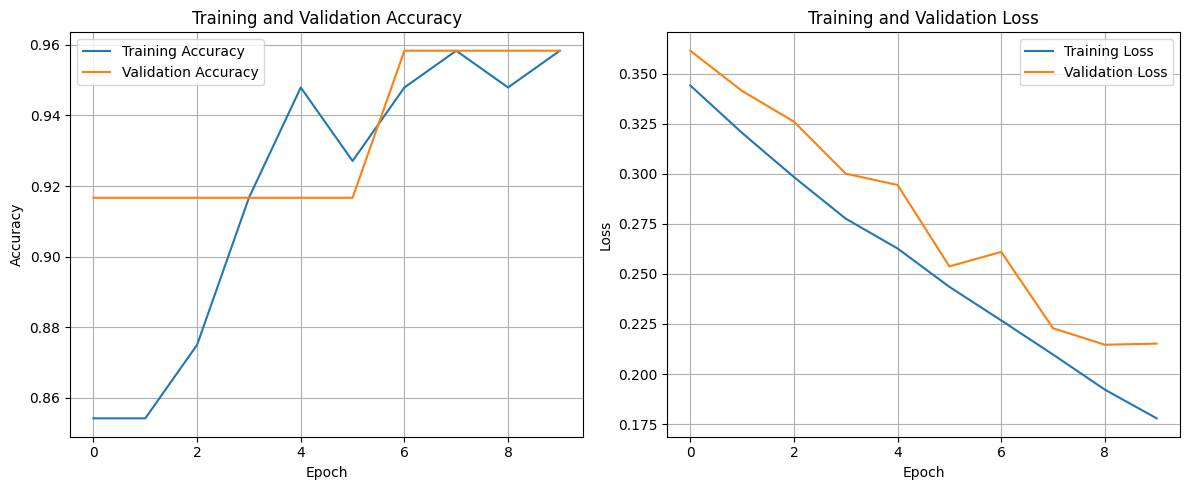

In [21]:
# @title Step 7 Code & Answers/plots of results

# Model is already trained and stored the history in above steps

# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 5))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()